### Project: Loan Eligibility Prediction

- Use **[gender, education, income, credit history, property area]** to make a model to predict **[if a loan will be approved or denied]**
- Identify patterns in **key features**
- Predict **loan amount**
- Identify patterns in **the impact of credit history**
- Identify patterns in **demographic analysis**
- Identify patterns **between loan term and loan eligibility**
- Identify patterns in **the impact of property area**

#### NOTE: This notebook is for self-educational purposes to familarize myself with EDA and associated libraries
- Resource: https://www.kaggle.com/code/talhabu/mastering-loan-eligibility-analysis-advance-eda?scriptVersionId=126121065

### Load Libraries

In [184]:
# Import foundational libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical Operations
import seaborn as sns # Statistical Data Visualization
sns.set_theme(style="darkgrid")
import sklearn
import matplotlib.pyplot as plt # Makes Matplotlib works like MATLAB
import matplotlib.patches as mpatches # Creates shapes

# Import plotly (library) for data visualization
import plotly.graph_objs as go # Creates Plotly graphs
from plotly.tools import make_subplots # Creates subplots to combine plots into one figure
from plotly.offline import iplot, init_notebook_mode # Dispalys plotly in Jupyter
init_notebook_mode(connected = True)
import plotly.express as px # Simplifies creating plotly graphs

# Additional Imports
from sklearn.impute import SimpleImputer # Handles missing values
import warnings # Manages warnings
warnings.filterwarnings("ignore")

# Import statistical analysis library (scipy)
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Import algorithm libraries for data analysis
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Algorithms for handling Imbalance Data
from imblearn.over_sampling import SMOTE, ADASYN

# Version Check
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
print(sns.__version__)
print(plt.matplotlib.__version__)
# print(plotly.__version__) # Only module is used, not full library
# print(stats.__version__) # Has no attribute for version
print(sm.__version__)
# print(imblearn.__version__) # Only module is used, not full library

1.4.4
1.21.5
1.0.2
0.13.2
3.5.2
0.13.2


### Prepare Dataset

In [185]:
# Import the csv data
train = pd.read_csv('../data/raw/loan-train.csv')
test = pd.read_csv('../data/raw/loan-test.csv')
data = train.copy()

In [186]:
# Prints for TRAIN dataset
print(f"Total {train.shape} Columns and Rows in the Train Dataset")
# Shape is stored as a 2D Array; [0] is each line (row) and [1] is each item (col)
print(f"Total {train.shape[0]} Rows in the Train Dataset")
print(f"Total {train.shape[1]} Columns in the Train Dataset \n")

# Prints for TEST dataset
print(f"Total {test.shape} (Rows, Col) in TEST Dataset")

Total (614, 13) Columns and Rows in the Train Dataset
Total 614 Rows in the Train Dataset
Total 13 Columns in the Train Dataset 

Total (367, 12) (Rows, Col) in TEST Dataset


In [187]:
# Data is a copy of TRAIN
data.head() # .head() is from pandas; it views the first few rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [188]:
# .info() provides info about the dataframe (what the chart is about)
# entries - non-null = nulls (clear this up later)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [189]:
# Prints basic stats
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


| Desc | Stats | Result |
| ------|------| -----|
| ApplicantIncome | mean 5403, std 6109 | Large range of income |
| CoapplicantIncome | mean 1621, std 2926 | Large range of income
| LoanAmount | mean 146, std 85 | Large range of loan amounts (in $)
| Loan_Amount_Term | mean 342, std 65 | about 342 months or 28.5 years (in months)
| Credit_History (binary variable; 1 has credit, 0 has none) | mean 0.84, std 0.36 | Most have a credit history

### Univariate Analysis

In [190]:
# Use seaborn to make different graphs
# Args: dataset, column/info, plot type with a default set, colors, size
def plot_data(data, column, plot_type='count', palette=['#4285F4', '#E37400'], figsize=(10,6)):
    fig, ax = plt.subplots(figsize=figsize)
    # Shows quantity for each, it's a bar graph
    if plot_type == 'count':
        sns.countplot(x=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"Count Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Count", size=12, weight='bold')
        total = len(data[column])
        for p in ax.patches:
            height = p.get_height()
            pct = 100 * height / total
            ax.annotate(f'{pct:.1f}%', (p.get_x()+0.3, height+5), fontsize=12)
    # Shows data points spread on categorical axis (to find clusters or outliers)
    elif plot_type == 'swarm':
        sns.swarmplot(y=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"Swarm Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Value", size=12, weight='bold')
    # Like a bar graph but smooth (shows frequency per value)
    elif plot_type == 'dist':
        sns.histplot(data=data, x=column, ax=ax, kde=True, palette=palette)
        ax.set_title(f"Distribution Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Frequency", size=12, weight='bold')
    # Bar graph but each bar split into sections
    elif plot_type == 'stacked':
        groupby_df = data.groupby(column)['Loan_Status'].value_counts(normalize=True).unstack()
        groupby_df.plot(kind='bar', stacked=True, ax=ax, color=palette)
        ax.set_title(f"Stacked Bar Plot of {column}", size=15, weight='bold')
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Proportion", size=12, weight='bold')
        ax.legend(title="Loan Status", loc='upper right')
        for i in range(groupby_df.shape[0]):
            for j in range(groupby_df.shape[1]):
                pct = groupby_df.iloc[i, j] * 100
                ax.annotate(f"{pct:.1f}%", xy=(i, groupby_df.iloc[i, :j].sum() + pct/2),
                            ha='center', va='center', color='white', weight='bold')
    else:
        print(f"Invalid plot type: {plot_type}")
    
    plt.show()

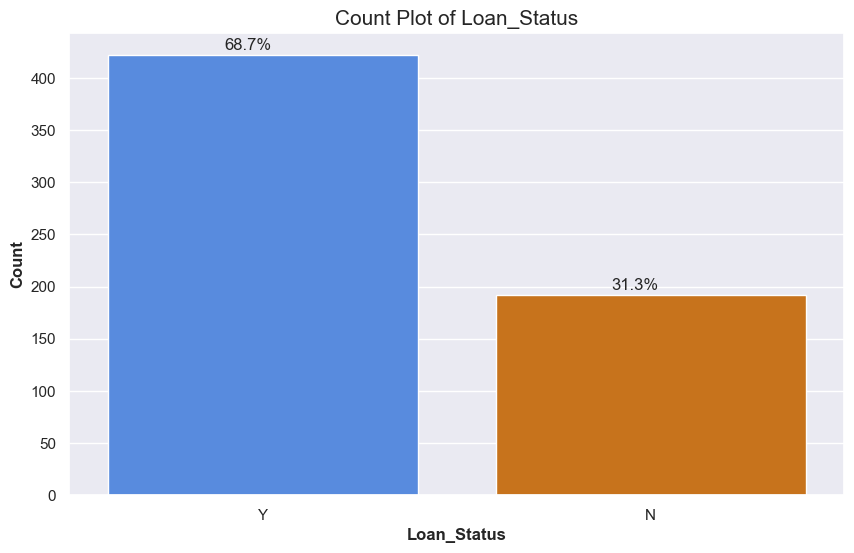

In [191]:
plot_data(data, 'Loan_Status', plot_type='count')

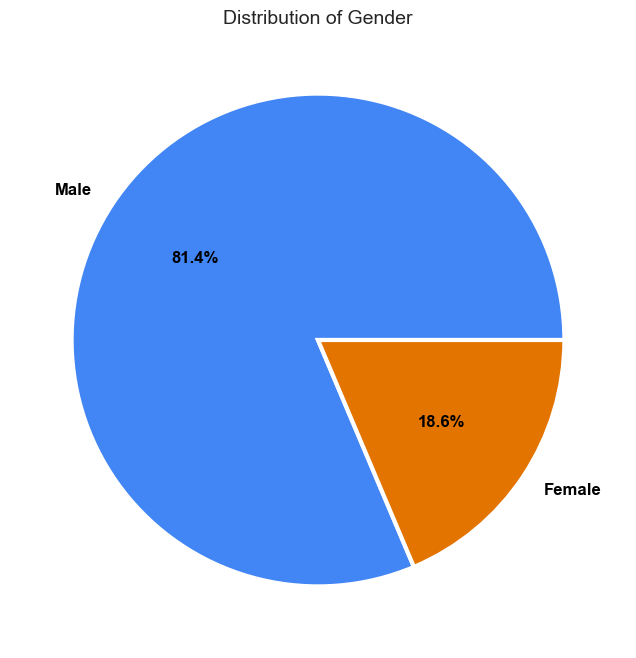

In [192]:
# Gender frequency
gender_counts = data['Gender'].value_counts()
color_pie = ['#4285F4', '#E37400']
# Pie Plot
names = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(gender_counts, labels=names, autopct='%.1f%%', colors=color_pie,
       wedgeprops={'linewidth': 3.0, 'edgecolor': '#FFFFFF'},
       textprops={'size': 'medium', 'color':'#000000', 'weight':'bold'})
ax.set_title('Distribution of Gender', fontsize=14)
plt.show()

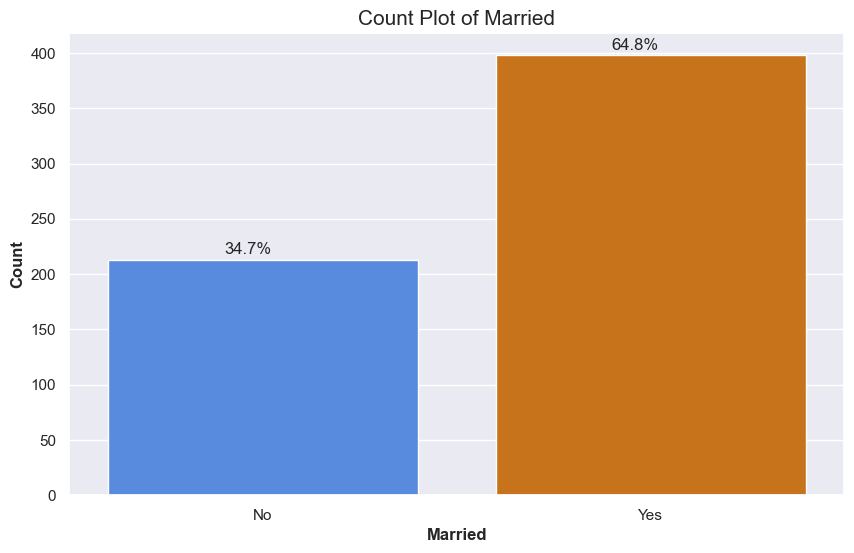

In [193]:
plot_data(data, 'Married', plot_type='count')

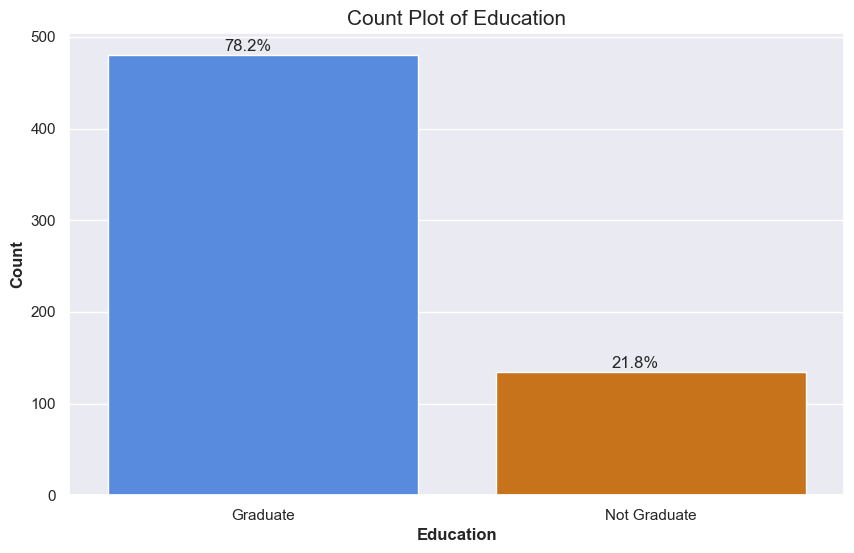

In [194]:
plot_data(data, 'Education', plot_type='count')

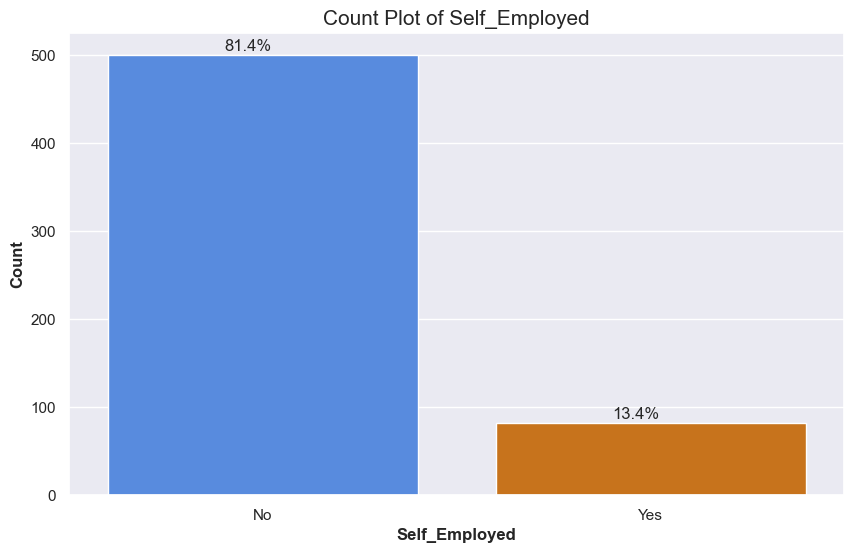

In [195]:
plot_data(data, 'Self_Employed', plot_type='count')

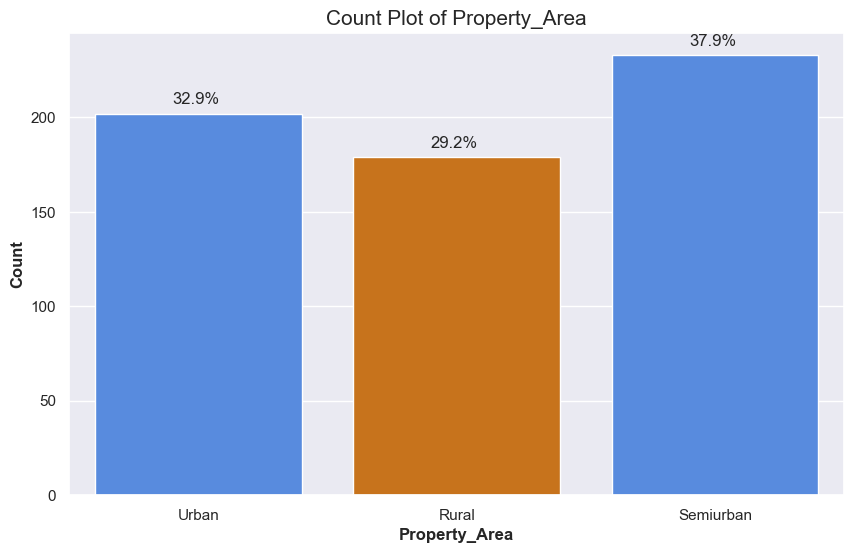

In [196]:
plot_data(data, 'Property_Area', plot_type='count')

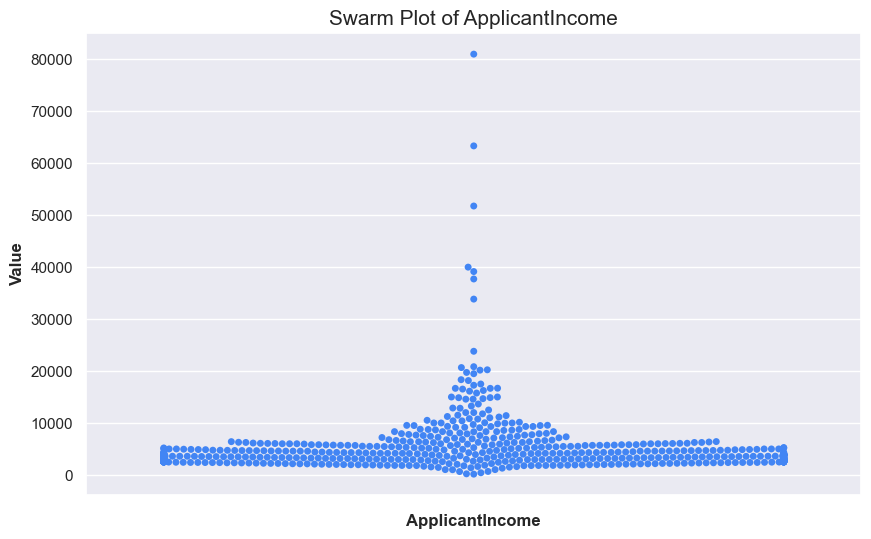

In [197]:
plot_data(data, 'ApplicantIncome', plot_type='swarm')

- It is skewed to most having incomes from 0 to 20,000
- Outliers may be at 80,000

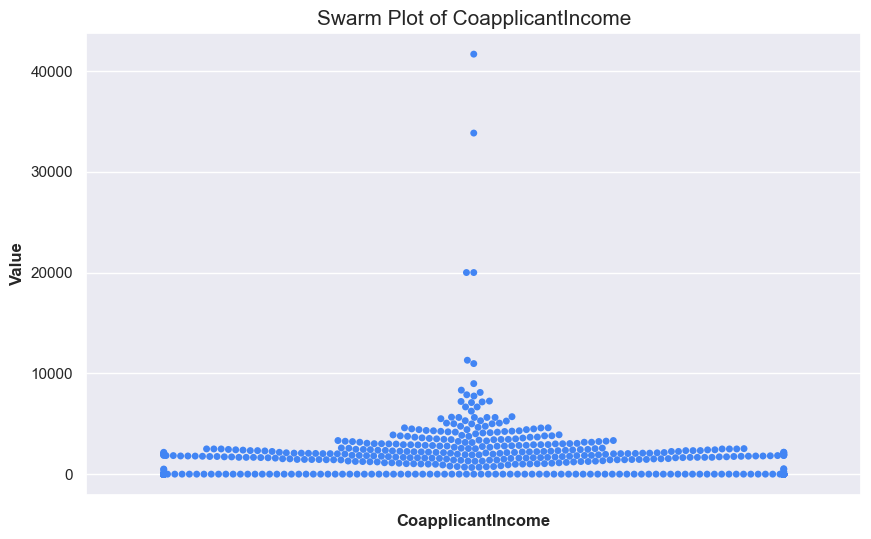

In [198]:
plot_data(data, 'CoapplicantIncome', plot_type='swarm')

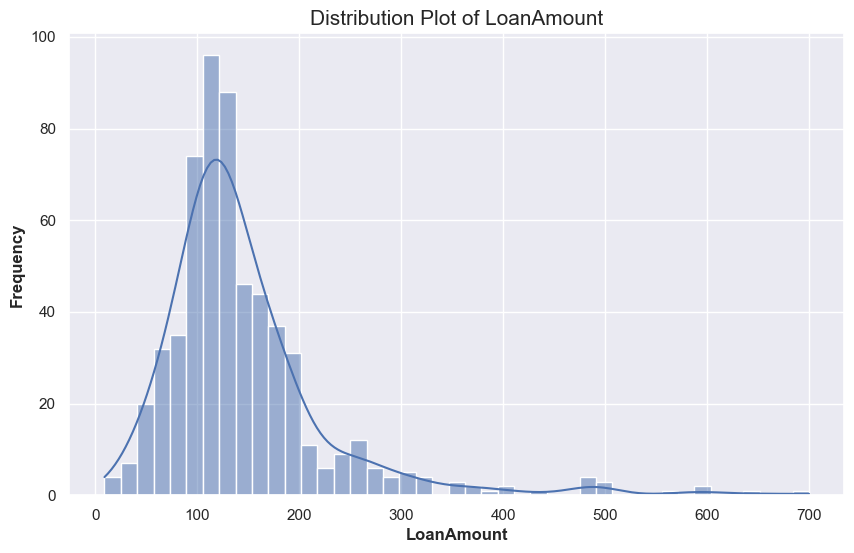

In [199]:
plot_data(data, 'LoanAmount', plot_type='dist')

- Right skewed, most people are getting smaller loans, but a few get large loans

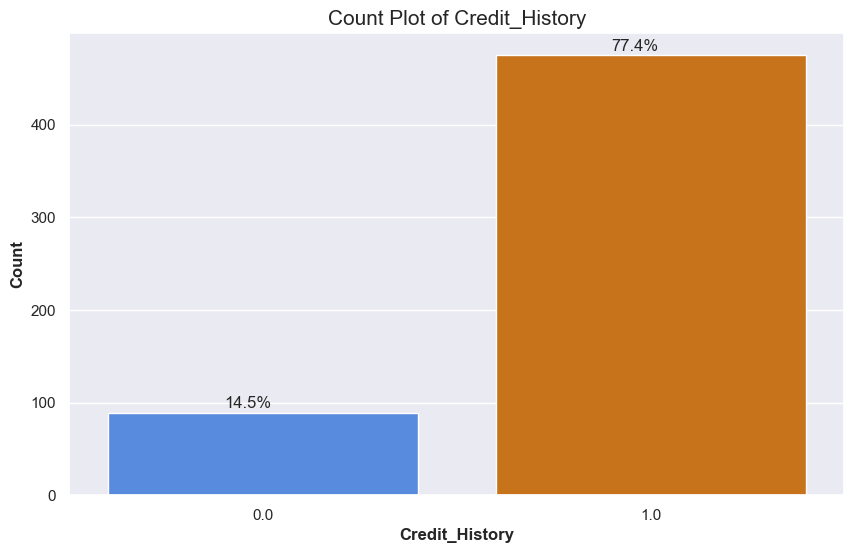

In [200]:
plot_data(data, 'Credit_History', plot_type='count')

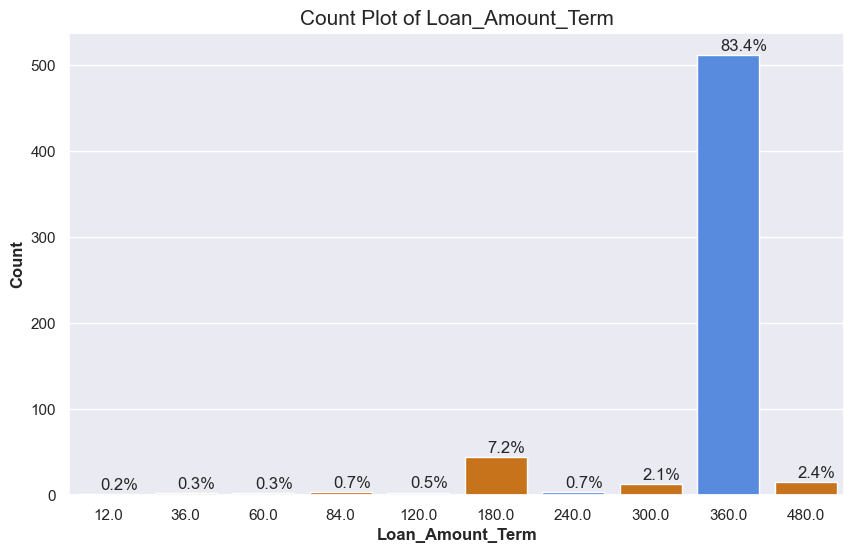

In [201]:
plot_data(data, 'Loan_Amount_Term', plot_type='count')

**Univariate Analysis (highlights the issue of missing values)**
- Loan_Amount_Term had 14 missing values
- Credit_History has a lot of missing values too
- Outliers seem to be in all cases that skew the data

### Cleaning Up Missing Values

In [202]:
# Impute (assigns a value) from mean, median or mode for missing values
print('NUMBER OF MISSING VALUES IN THE DATASET: \n')
display(train.isnull().sum().sort_values(ascending=False))
print("------------------------")


train_rows, train_cols = train.shape[0], train.shape[1]
# All cells
train_cells = (train_rows * train_cols)
# Add within category, then add by category
train_missing = train.isnull().sum().sum()

print(f"% of Missing Values: {round((train_missing / train_cells) * 100, 3)}%")

NUMBER OF MISSING VALUES IN THE DATASET: 



Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

------------------------
% of Missing Values: 1.867%


In [203]:
# Imputer => Use mean for LoanAmount and Loan_Amount_Term
imputer = SimpleImputer(strategy='mean')
data[['LoanAmount', 'Loan_Amount_Term']] = imputer.fit_transform(data[['LoanAmount', 'Loan_Amount_Term']])

# Imputer => Use mode for Credit_History, Self_Employed, Dependents, Gender, Married
imputer = SimpleImputer(strategy='most_frequent')
data[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']] = imputer.fit_transform(data[['Credit_History', 'Self_Employed', 'Dependents', 'Gender', 'Married']])

### Clearing Up Outliers
- Using distribution plot (for the curve)
- And boxplot like in STAT 2507 to see the common outliers outisde of the Q1 and Q3 quartiles

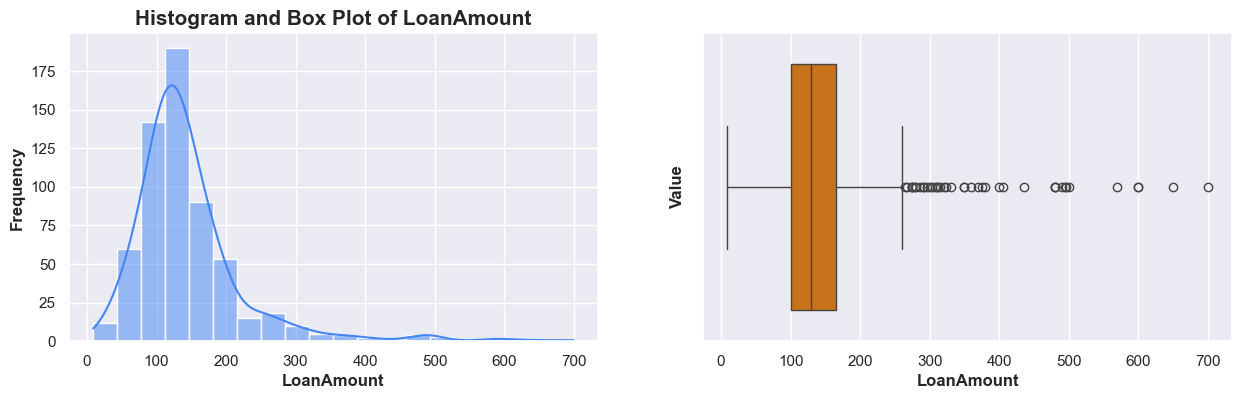

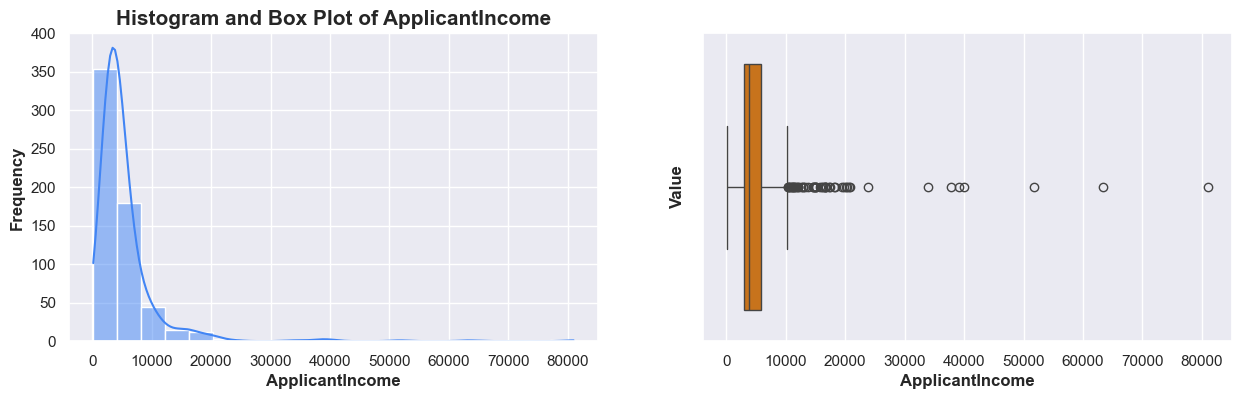

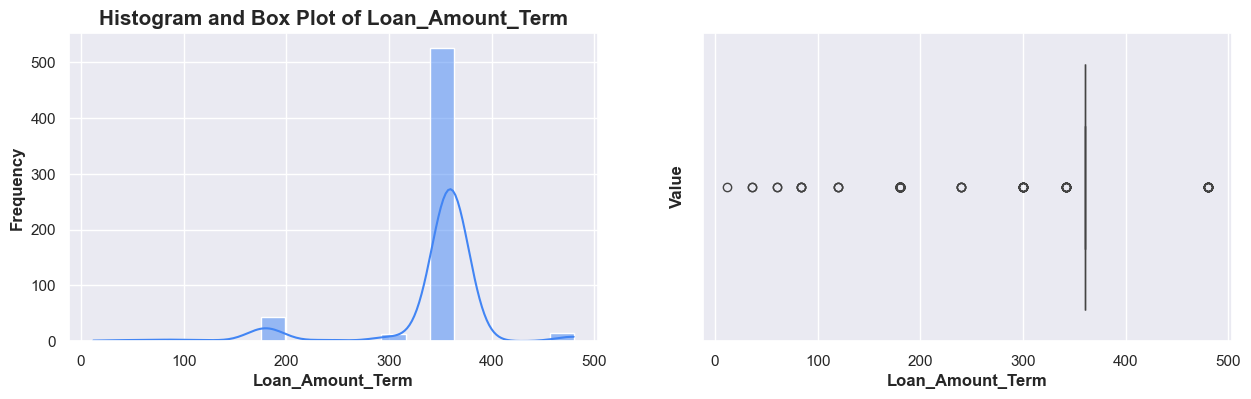

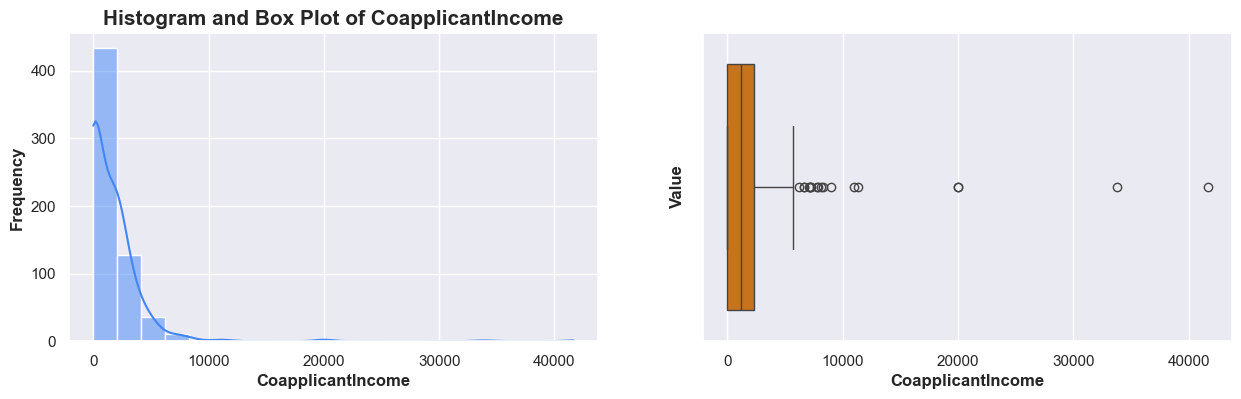

In [204]:
# List of the categories with outliers
col_outliers = ["LoanAmount","ApplicantIncome","Loan_Amount_Term","CoapplicantIncome"]

# Creates a histogram and box plot
def plot_hist_box(data, column):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=ax1, color='#4285F4')
    sns.boxplot(data=data, x=column, ax=ax2, color='#E37400')
    ax1.set_title(f"Histogram and Box Plot of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()

# Iterates through the above list and makes graphs for each
for col in col_outliers:
    plot_hist_box(data, col)

In [205]:
# Removes outliers based on box plot
def remove_outliers(data, columns, k=1.5):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        # Filters DataFrame (keeps only those the range: lower < keep < upper)
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Runs and checks it
columns = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome']
data = remove_outliers(data, columns) # Overwrites the data with the outlier-free one
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            433 non-null    object 
 1   Gender             433 non-null    object 
 2   Married            433 non-null    object 
 3   Dependents         433 non-null    object 
 4   Education          433 non-null    object 
 5   Self_Employed      433 non-null    object 
 6   ApplicantIncome    433 non-null    int64  
 7   CoapplicantIncome  433 non-null    float64
 8   LoanAmount         433 non-null    float64
 9   Loan_Amount_Term   433 non-null    float64
 10  Credit_History     433 non-null    object 
 11  Property_Area      433 non-null    object 
 12  Loan_Status        433 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 47.4+ KB


### Bivariate Analysis
- Analyzing relationships between two variables

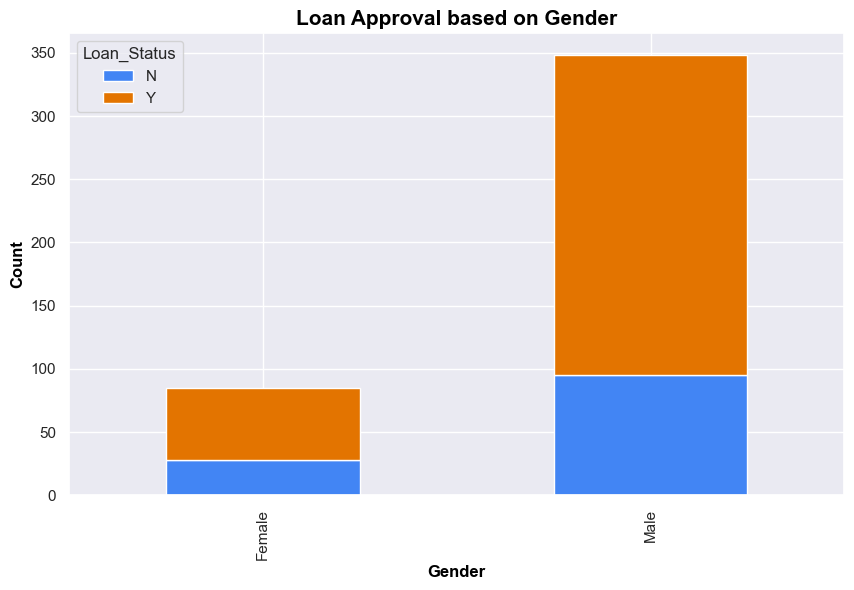

In [206]:
# Stacked Bar graph
gender_loan = data.groupby(['Gender', 'Loan_Status']).size().unstack()
colors=['#4285F4', '#E37400']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Gender', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

- \# of Male Applicants > # of Female Applicants
- About the same approval rate

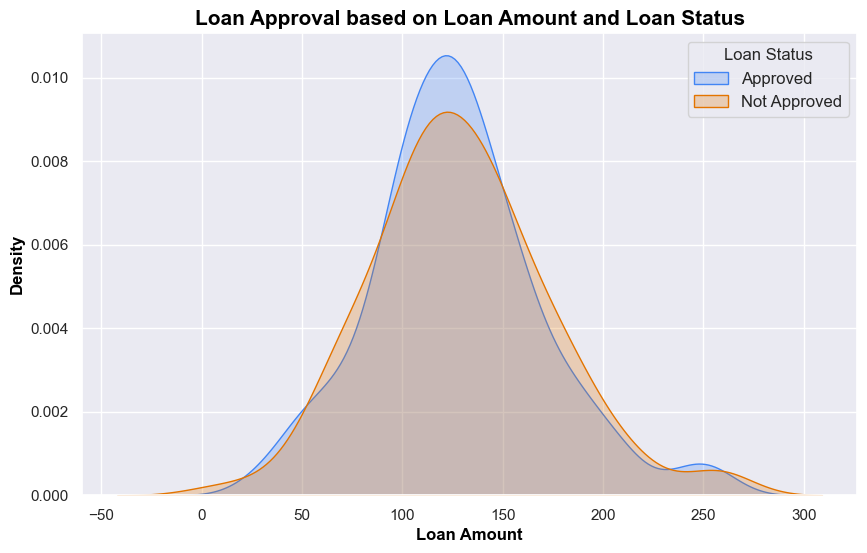

In [207]:
# Kernel Density Estimate (KDE) Plot
plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['Loan_Status']=='Y', 'LoanAmount'], label='Approved', fill='1', color='#4285F4')
sns.kdeplot(data.loc[data['Loan_Status']=='N', 'LoanAmount'], label='Not Approved', fill='1', color='#E37400')
plt.title('Loan Approval based on Loan Amount and Loan Status', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Loan Amount', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Density', fontsize=12, fontweight='bold', color='black')
plt.legend(title='Loan Status', loc='upper right', fontsize=12)
plt.show()

- At around LoanAmount 250, it shows how people who apply for larger loans has a slightly higher density of approvals

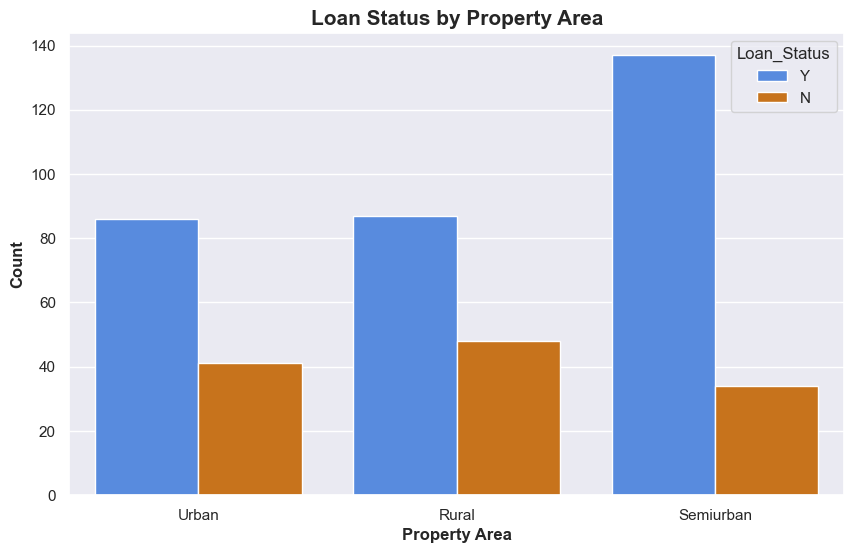

In [208]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Property_Area', hue='Loan_Status', palette=colors)
plt.title('Loan Status by Property Area', fontsize=15, fontweight='bold')
plt.xlabel('Property Area', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

- Living in a semiurban location seems to have a higher loan_status but also more people applying
- Applying from rural has the highest chance of rejection
- Could speculate location can correlate to income

- Urban and SemiUrban tend to have greater amounts of people making around the 3000 range with greater hikes of people from Rural making 6000

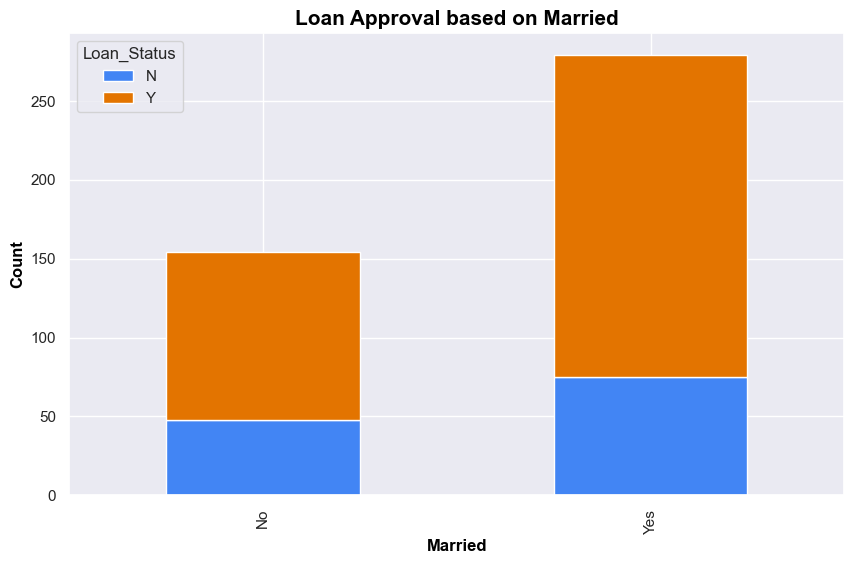

In [210]:
# Approval based on marriage
gender_loan = data.groupby(['Married', 'Loan_Status']).size().unstack()
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Married', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Married', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

- Being married slightly increases your chances

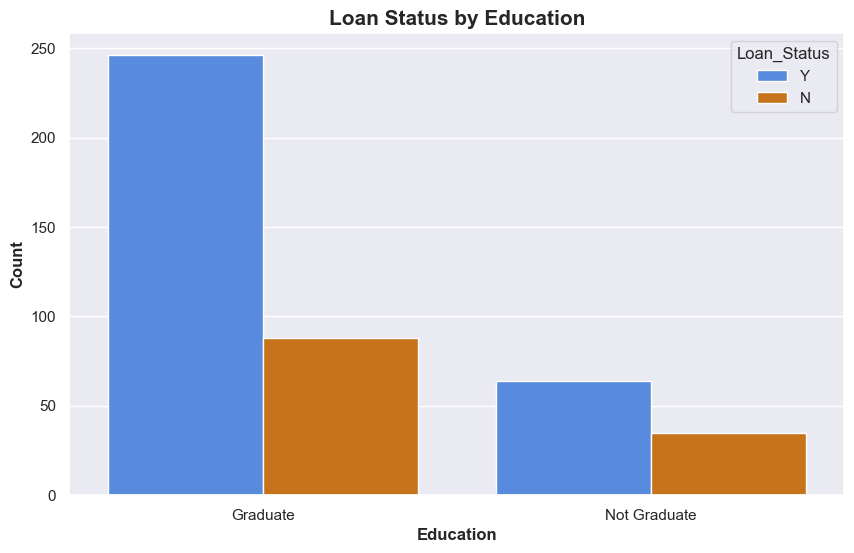

In [211]:
# Loan approval based on education
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education', hue='Loan_Status', palette=colors)
plt.title('Loan Status by Education', fontsize=15, fontweight='bold')
plt.xlabel('Education', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

- Overall more people applying who graduated, and have a significantly better approval rate

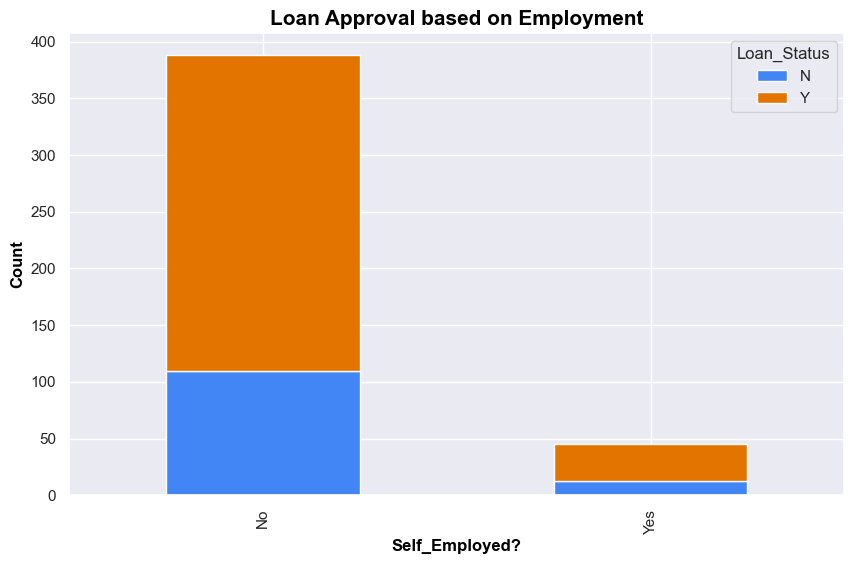

In [212]:
# Loan approval based on employment
gender_loan = data.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Employment', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Self_Employed?', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

- The non-self employed have more approvals

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


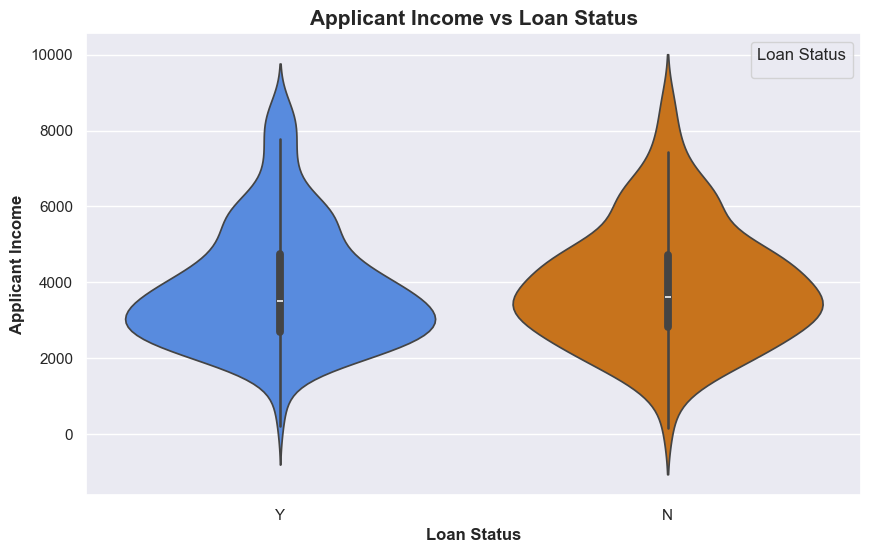

In [213]:
# 
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Loan_Status', y='ApplicantIncome', hue='Loan_Status', palette=colors)
plt.title('Applicant Income vs Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Applicant Income', fontsize=12, fontweight='bold')
plt.legend(title='Loan Status', fontsize=12, title_fontsize=12)
plt.show()

- Violin Plot: Mix of boxplot and KDE plot to highlight distribution, central tendency and variability of the data
- Shows distribution of approved loans are wider
- 

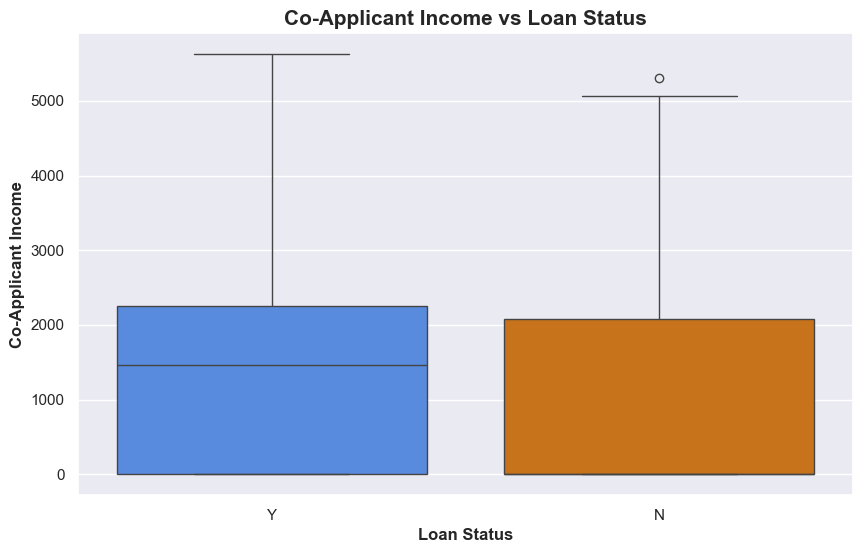

In [215]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Loan_Status', y='CoapplicantIncome', palette=colors)
plt.title('Co-Applicant Income vs Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Co-Applicant Income', fontsize=12, fontweight='bold')
plt.show()

- Median coapplicant income was higher for approved vs rejected
- Range is wider for approved coapplicants too
- Distribution of approved coapplicant income is slightly right skewed

### Hypothesis Testing (5 Questions)

Question 1: Does the applicant's gender have an impact on loan approval rates?
- H_0: Applicant gender has no significance on loan approval rates
- H_A: Applicant gender has significant on loan approval rates
- a = 0.05 (if p <= a, reject H_0 and assume H_A)

In [217]:
# Approach
# - Use Contingency Table: Displays frequency distribution
# - Use Chi-Squared Test of Indepndence: Checks if two variables have significant association 
# (results change if two variables were independent)

# Contingency table of Gender to Loan_Status
contingency_table = pd.crosstab(data['Gender'], data['Loan_Status'])
print(contingency_table)

# Chi-Square Test: 2D array (contingency table) is checked for frequencies deviating from expect frequencies under H_0 of indepedence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Results
print('P-value: ', p_val)
if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status   N    Y
Gender              
Female       28   57
Male         95  253
P-value:  0.3681366912789088
We fail to reject the null hypothesis.


Q1 Result
- Since p = 0.368 and p < a, we fail to reject the null hypothesis where gender does not have significance on loan approval rates

Question 2: Is there a significant difference in loan approval rates between married and unmarried individuals?
- H_0: Being married or unmarried has no significance on loan approval rates
- H_A: Being married or unmarried has significance on loan approval rates

In [218]:
# Contingency table of Gender to Loan_Status
contingency_table = pd.crosstab(data['Married'], data['Loan_Status'])
print(contingency_table)

# Chi-Square Test: 2D array (contingency table) is checked for frequencies deviating from expect frequencies under H_0 of indepedence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Results
print('P-value: ', p_val)
if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status   N    Y
Married             
No           48  106
Yes          75  204
P-value:  0.4033403107273086
We fail to reject the null hypothesis.


Q2 Results
- We fail to reject H0, not enough evidence to show marriage has significance on loan approval rates

Question 3: Does the applicant's education level have an impact on loan approval rates?
- H_0: Education level has no significance on loan approval rates
- H_A: Education level has significance on loan approval rates

In [221]:
# Contingency table
cont_table = pd.crosstab(data['Loan_Status'], data['Education'], margins=True)

# Chi-squared test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Chi-square statistic: Quantifies how far observed data deviates from expected (if independent)
# ^ high num means big discrepancy, low num means small discrepancy
# P-value: Probabability that H_0 is true (smaller p-value means stronger evidence agaisnt H_0)
# Degrees of Freedom: Shows number of independent inputs (it's like num of ticks)
# Expected Frequencies: Expected if variables were independent

print(f'Chi-squared statistic: {chi2}\nP-value: {pval}\nDegrees of freedom: {dof}\nExpected frequencies:\n{expected}')

# P-value results
if p_val < 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Chi-squared statistic: 3.0457118743780653
P-value: 0.5502049856737128
Degrees of freedom: 4
Expected frequencies:
[[ 94.87759815  28.12240185 123.        ]
 [239.12240185  70.87759815 310.        ]
 [334.          99.         433.        ]]
We fail to reject the null hypothesis.


Q3 Results:
- Since p = 0.550 and p > a, we fail to reject H_0
- We cannot conclude educational leve has significnace on loan approval rates

Question 4: Is there a significant difference in loan approval rates between self-employed and salaried individuals?
- H_0: Being self-Employed or salaried individuals has no significance on loan approval rates
- H_A: Being self-Employed or salaried individuals has significance on loan approval rates
- Uses a two-t test since we have two independent groups

In [224]:
# Contingency table
cont_table = pd.crosstab(data['Self_Employed'], data['Loan_Status'])

# Chi-squared
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")

if p_val < 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
We fail to reject the null hypothesis.


Q4 Results:
- Since p = 1.0 and p > a, we fail to reject the H_0
- Being self-employed or salaried has no significance on loan approval rates

Q5: Does the loan amount have a significant impact on loan approval?
- H_0: Loan amount has no significance on loan approval
- H_A: Loan amount has significance on loan approval
- Use logistic regression analysis to analyze relationship between binary dependent variable and an independent variable: Classifies data into one of two possible outcomes (yes or no of the binary dependant variable)

In [225]:
# Binary outcome variable
data_loan = data.copy()
data_loan['loan_approved'] = data_loan['Loan_Status'].map({'Y': 1, 'N': 0})

# Logistic regression model
X = data_loan[['LoanAmount']]
y = data_loan['loan_approved']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

# Results
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.596635
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          loan_approved   No. Observations:                  433
Model:                          Logit   Df Residuals:                      431
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:               0.0001942
Time:                        18:06:49   Log-Likelihood:                -258.34
converged:                       True   LL-Null:                       -258.39
Covariance Type:            nonrobust   LLR p-value:                    0.7514
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0244      0.334      3.070      0.002       0.370       1.678
LoanAmount    -0.0008      0.

Q5 Results: 
- Since p = 0.751, and p > a, we fail to reject H_0
- The loan amount has no signifncance on loan approval rate
- Pseudo R-Squared value is low, meaning the model does not fit well with the data

### Multivariate Analysis